# Project Overview

## Artificial Neural Networks


How they work:
Artificial Neural Network(ANN) uses the processing of the brain as a basis to develop algorithms that can be used to model complex patterns and prediction problems.

In our brain, there are billions of cells called neurons, which processes information in the form of electric signals. External information is received by the dendrites of the neuron, processed in the neuron cell body, converted to an output and passed through the Axon to the next neuron. The next neuron can choose to either accept it or reject it depending on the strength of the signal.[1]

I am going to attempt to classifying if a show will close or not using this type of network.

![ann](img/photo_1.png)

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# The Data

The same data and techinques for manipulating it into a usable data frame are used below as in the Baseline Modeling Notebook.

In [2]:
df = pd.read_excel('Broadway_Grosses.xlsx')

In [3]:
df['show'] = df['show'].str.capitalize()

In [4]:
df = df[~df.type.str.contains("Special")]

In [5]:
df = df.set_index('date')

In [6]:
df.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2017-05-21,NaN,Play,Hudson,4,0,212626,$,0.48,3378,NaN,0.87,0,Mystery,1,0
2017-05-28,NaN,Play,Hudson,7,0,298438,212626,0.45,5079,3378.0,0.75,0,Mystery,1,0
2017-06-04,NaN,Play,Hudson,8,0,282053,298438,0.36,5230,5079.0,0.67,0,Mystery,1,0
2017-06-11,NaN,Play,Hudson,8,0,288446,282053,0.37,5554,5230.0,0.72,0,Mystery,1,0
2017-06-18,NaN,Play,Hudson,8,0,301461,288446,0.39,6018,5554.0,0.78,0,Mystery,1,0


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

show                0
type                0
theatre             0
previews            0
performances        0
grosses             0
prev_week_gross     0
GG%GP               0
attend              0
prev_week_attend    0
%cap                0
close_month         0
genre               0
tony_noms           0
tony_awards         0
dtype: int64

In [9]:
df.shape

(7840, 15)

In [10]:
df.describe()

,previews,performances,grosses,GG%GP,attend,prev_week_attend,%cap,close_month,tony_noms,tony_awards
count,7840.000000,7840.000000,7.840000e+03,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000
mean,0.501148,7.437117,9.773324e+05,0.737249,8541.012883,8469.217219,0.871644,0.131250,6.778061,2.799362
std,1.834107,1.950236,5.822765e+05,0.246903,2805.710607,2877.978093,0.134217,0.337695,4.808434,3.330795
min,0.000000,0.000000,9.050300e+04,0.140000,1742.000000,500.000000,0.340000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,5.833712e+05,0.550000,6515.750000,6449.500000,0.780000,0.000000,2.000000,0.000000
50%,0.000000,8.000000,8.396750e+05,0.710000,8130.000000,8099.000000,0.910000,0.000000,7.000000,1.000000
75%,0.000000,8.000000,1.210884e+06,0.930000,10497.250000,10482.250000,0.990000,0.000000,10.000000,6.000000
max,8.000000,9.000000,4.041493e+06,1.700000,17334.000000,17334.000000,1.040000,1.000000,16.000000,11.000000


In [11]:
df.groupby(['tony_noms', 'grosses']).count()

show  type  theatre  previews  performances  \
tony_noms grosses                                                
0         109716      1     1        1         1             1   
          126468      1     1        1         1             1   
          129388      1     1        1         1             1   
          138549      1     1        1         1             1   
          141742      1     1        1         1             1   
...                 ...   ...      ...       ...           ...   
16        3646320     1     1        1         1             1   
          3797844     1     1        1         1             1   
          3808299     1     1        1         1             1   
          3854874     1     1        1         1             1   
          4041493     1     1        1         1             1   

                   prev_week_gross  GG%GP  attend  prev_week_attend  %cap  \
tony_noms grosses                                                           
0         109716                 1      1       1                 1     1   
          126468                 1      1       1                 1     1   
          129388                 1      1       1                 1     1   
          138549                 1      1       1                 1     1   
          141742                 1      1       1                 1     1   
...                            ...    ...     ...               ...   ...   
16        3646320                1      1       1                 1     1   
          3797844                1      1       1                 1     1   
          3808299                1      1       1                 1     1   
          3854874                1      1       1                 1     1   
          4041493                1      1       1                 1     1   

                   close_month  genre  tony_awards  
tony_noms grosses                                   
0         109716             1      1            1  
          126468             1      1            1  
          129388             1      1            1  
          138549             1      1            1  
          141742             1      1            1  
...                        ...    ...          ...  
16        3646320            1      1            1  
          3797844            1      1            1  
          3808299            1      1            1  
          3854874            1      1            1  
          4041493            1      1            1  

[7839 rows x 13 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7840 entries, 2019-11-17 to 2015-02-22
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show              7840 non-null   object 
 1   type              7840 non-null   object 
 2   theatre           7840 non-null   object 
 3   previews          7840 non-null   int64  
 4   performances      7840 non-null   int64  
 5   grosses           7840 non-null   int64  
 6   prev_week_gross   7840 non-null   object 
 7   GG%GP             7840 non-null   float64
 8   attend            7840 non-null   int64  
 9   prev_week_attend  7840 non-null   float64
 10  %cap              7840 non-null   float64
 11  close_month       7840 non-null   int64  
 12  genre             7840 non-null   object 
 13  tony_noms         7840 non-null   int64  
 14  tony_awards       7840 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 980.0+ KB


# Modeling

## Labels and Features

In [13]:
features = df.drop('close_month', axis = 1)
labels = df['close_month']

In [14]:
features[0:5]

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,
2019-11-17,A christmas carol 2019,Play,Lyceum,8,0,257525,106450,0.30,4194,1651.0,0.62,Seasonal,5,3
2019-11-24,A christmas carol 2019,Play,Lyceum,1,7,384493,257525,0.45,5590,4194.0,0.82,Seasonal,5,3
2019-12-01,A christmas carol 2019,Play,Lyceum,0,9,734745,384493,0.77,5988,5590.0,0.78,Seasonal,5,3
2019-12-08,A christmas carol 2019,Play,Lyceum,0,8,757702,734745,0.90,6164,5988.0,0.91,Seasonal,5,3
2019-12-15,A christmas carol 2019,Play,Lyceum,0,8,822983,757702,0.97,6619,6164.0,0.98,Seasonal,5,3


In [15]:
labels[0:5]

date
2019-11-17    0
2019-11-24    0
2019-12-01    0
2019-12-08    0
2019-12-15    0
Name: close_month, dtype: int64

## One Hot Encoding

In [16]:
features = pd.get_dummies(features)
features[0:5]

,previews,performances,grosses,GG%GP,attend,prev_week_attend,%cap,tony_noms,tony_awards,show_A bronx tale the musical,...,genre_ Jukebox,genre_Alternative,genre_Classic,genre_Comedy,genre_Drama,genre_Jukebox,genre_Mystery,genre_Seasonal,genre_Special,genre_Tragedy
date,,,,,,,,,,,,,,,,,,,,,
2019-11-17,8,0,257525,0.30,4194,1651.0,0.62,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-11-24,1,7,384493,0.45,5590,4194.0,0.82,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-12-01,0,9,734745,0.77,5988,5590.0,0.78,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-12-08,0,8,757702,0.90,6164,5988.0,0.91,5,3,0,...,0,0,0,0,0,0,0,1,0,0
2019-12-15,0,8,822983,0.97,6619,6164.0,0.98,5,3,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
features.shape

(7840, 8090)

In [18]:
#got an error message when running model, soulution was setting all values to float32.
features = features.values.astype('float32')
labels = labels.values.astype('float32')

## Test, Train, Validation

In [19]:
from sklearn.model_selection import train_test_split
#creating training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=0)
#creating validation labels
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

## Model Architechture

In [20]:
#build sequential model
classifier = Sequential()

In [21]:
classifier.add(Dense(8, activation = 'relu', input_shape=(8090,)))
classifier.add(Dropout(0.2))

classifier.add(Dense(2, activation = 'softmax'))

In [22]:
from keras.optimizers import SGD 
opt = SGD(lr = .1, momentum = .25)

In [23]:
#binary- we have two possible outcomes.
classifier.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
##please note: tried to add SMOTE to this and ending up getting terrible results.  Accuracy was .12-.25.

weights = {0:1, 1:1}
history = classifier.fit(features_train, 
                         labels_train, 
                         batch_size = 10, 
                         epochs = 50,
                         class_weight=weights, validation_data=(features_validation, labels_validation))

Epoch 1/50
502/502 [==============================] - 1s 2ms/step - loss: 18.1651 - accuracy: 0.8658 - val_loss: 0.3802 - val_accuracy: 0.8733
Epoch 2/50
502/502 [==============================] - 0s 738us/step - loss: 0.3975 - accuracy: 0.8646 - val_loss: 0.3801 - val_accuracy: 0.8733
Epoch 3/50
502/502 [==============================] - 0s 752us/step - loss: 0.3785 - accuracy: 0.8746 - val_loss: 0.3804 - val_accuracy: 0.8733
Epoch 4/50
502/502 [==============================] - 0s 748us/step - loss: 0.3730 - accuracy: 0.8773 - val_loss: 0.3801 - val_accuracy: 0.8733
Epoch 5/50
502/502 [==============================] - 0s 749us/step - loss: 0.3763 - accuracy: 0.8757 - val_loss: 0.3810 - val_accuracy: 0.8733
Epoch 6/50
502/502 [==============================] - 0s 749us/step - loss: 0.3843 - accuracy: 0.8717 - val_loss: 0.3815 - val_accuracy: 0.8733
Epoch 7/50
502/502 [==============================] - 0s 732us/step - loss: 0.3929 - accuracy: 0.8667 - val_loss: 0.3812 - val_accuracy: 

# Results

In [25]:
prediction = classifier.predict(features_test)

In [26]:
performance= classifier.evaluate(features_test, labels_test)
print(performance)

49/49 [==============================] - 0s 579us/step - loss: 0.4119 - accuracy: 0.8565
[0.4118916988372803, 0.8565050959587097]


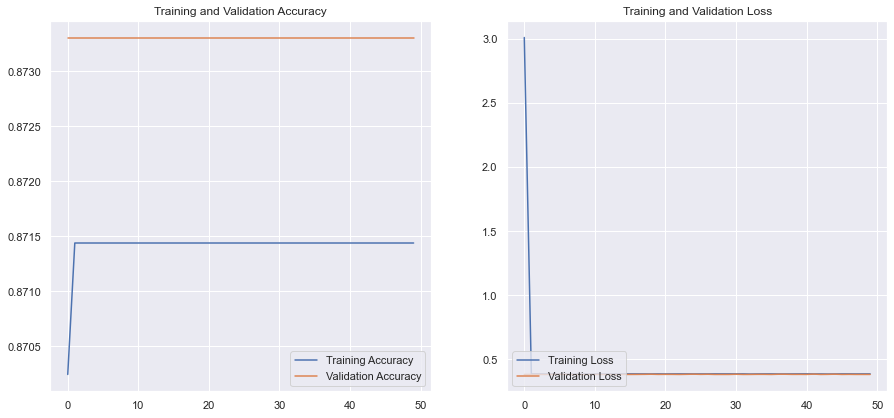

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

## Confusion Matrix

In [28]:
cm = confusion_matrix(y_true=labels_test, y_pred=np.argmax(prediction, axis=-1))

In [29]:
import itertools

In [30]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
cm_labels = ['Do Not Close', 'Close']

Confusion matrix, without normalization
[[1343    0]
 [ 225    0]]


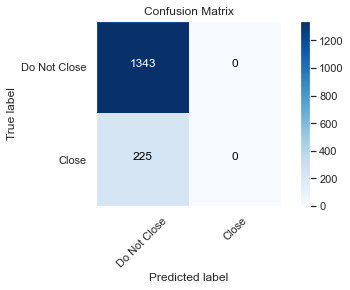

In [32]:
plot_confusion_matrix(cm=cm, classes=cm_labels, title='Confusion Matrix')

# Conclusion

I still think that I would stick with the random forrest or XGBoost model.  The accuracy was slightly higher and the confusion matrix looked normal.  Again, like in the SVM the model wants to only classify one variable however it is highly accurate at classifying that one variable.

"Both Support Vector Machines (SVMs) and Artificial Neural Networks (ANNs) are supervised machine learning classifiers. An ANN is a parametric classifier that uses hyper-parameters tuning during the training phase. An SVM is a non-parametric classifier that finds a linear vector (if a linear kernel is used) to separate classes. Actually, in terms of the model performance, SVMs are sometimes equivalent to a shallow neural network architecture. Generally, an ANN will outperform an SVM when there is a large number of training instances, however, neither outperforms the other over the full range of problems."[2]

This happened for this data. The SVM and the neural network behaved similarly in how they were trying to classify the outcome.  I cannot say why specifically it chose one side over the other but my gut instinct was class imbalance.  However it is important to note that when class imbalance was adjusted with SMOTE it just flip flopped sides.

# References

[1]https://towardsdatascience.com/introduction-to-neural-networks-advantages-and-applications-96851bd1a207#:~:text=Artificial%20Neural%20Network(ANN)%20uses,complex%20patterns%20and%20prediction%20problems.&text=In%20our%20brain%2C%20there%20are,the%20form%20of%20electric%20signals.

[2]https://www.pico.net/kb/advantages-of-artificial-neural-networks-over-support-vector-machines#:~:text=Both%20Support%20Vector%20Machines%20